<font size=7>LFP Animations

<font color="red">

**To Do**
* run filtes on data, see if graphs look different

# <font color="grey"> Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt

# Ash's animation imports
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
from matplotlib.widgets import RadioButtons, Slider, Cursor
import math

# My imports
import pickle
from human_hip.basics import read_phy_files
from human_hip.lfp import butter_filter, get_brain_waves
import  braingeneers.data.datasets_electrophysiology as ephys

# <font color="purple"> Ash Code

## <font color="purple">2D Scatter

In [42]:



class AnimatedScatter2D(object):
    def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100):
        # self.fig = plt.figure()
        # self.ax = self.fig.add_subplot(111)

        self.fig, self.ax = plt.subplots(1,1, figsize=(15,12) )
        self.data = data
        self.x = x
        self.y = y
        self.cursor = Cursor(self.ax, useblit=True, color='red')

        

        self.title = self.ax.set_title('Amplitudes')
        
        self.zmin = zmin
        self.zmax = zmax
        print(zmin,zmax)
        
        # make colorbar
        self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
        self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
        #self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
        self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=100, 
                                          init_func=self.setup_plot, blit=False)

        

    def setup_plot(self):
        self.scat = self.ax.scatter(self.x, self.y, norm= self.norm, c=self.data[:,0], cmap=cm.coolwarm)#,
        return self.scat
        

        # self.ax.set_xlabel('test')
        

    def update(self,i):
        self.scat.set_array(self.data[:,i])
        self.ax.set_title(f"{i/20:0.2f}ms")



    def save(self, filename):
        '''Saves file'''
        self.ani.save(filename)



# a = AnimatedTriSurf3D(zmin=-15, zmax = 15)
# plt.show()

## <font color="purple"> 3D Animation

In [3]:


# class AnimatedTriSurf3D(object):
#     def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100, fps = 20,elev=-30,azim=-90):
#         self.fig = plt.figure()
#         self.data = data
#         self.x = x
#         self.y = y

#         self.elev = elev
#         self.azim = azim

#         self.ax = self.fig.add_subplot(111, projection='3d')

#         self.title = self.ax.set_title('Amplitudes')
#         self.fps = fps
        
#         self.zmin = zmin
#         self.zmax = zmax
#         print(zmin,zmax)
#         # make colorbar
#         self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
#         self.cbar = self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
#         self.cbar.set_label('Amplitude (uV)')
#         self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
#         self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1, 
#                                           init_func=self.setup_plot, blit=False)
                        
        
#         # self.setup_plot()
#         # plt.show()
        

#     def setup_plot(self):
#         # self.scat = self.ax.scatter(self.x,self.y,self.data[:,0])#,c=[data[:,0]],cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
        
#         self.surf = self.ax.plot_trisurf(self.x, self.y, self.data[:,0], cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
#         self.ax.set_zlim(self.zmin, self.zmax)
#         self.ax.zaxis.set_major_formatter('{x:.02f}')
#         # Set roll, azimuth
#         # self.ax.view_init(elev=-90,azim = -90)
#         self.ax.view_init(elev=self.elev,azim = self.azim)
        

#         # self.ax.set_xlabel('test')
        

#     def update(self,i):
        
#         self.ax.clear()
#         colors = self.cmapper.to_rgba(self.data[:,i])
#         # ax.scatter(x, y, data[:,0],c=data[:,0], cmap=cm.coolwarm, vmin=zmin, vmax=zmax)
#         # self.scat._offsets3d = (self.x,self.y,self.data[:,i])
#         # self.scat._facecolors = colors
#         self.surf = self.ax.plot_trisurf(self.x, self.y, self.data[:,i], cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False, norm = self.norm, edgecolor = 'black')

#         self.ax.set_zlim(self.zmin, self.zmax)
#         self.ax.set_title(f"{i/20:0.2f}ms")
#         self.ax.set_xlabel('um')
#         self.ax.set_ylabel('um')

#     def save(self, filename):
#         '''Saves file'''
#         self.ani.save(filename, fps = self.fps)






## <font color="grey">Rewrite Ash's Code

In [ ]:
# class AnimatedScatter2D(object):
#     def __init__(self,data,x,y,zmin=-2000, zmax=0, frames=100):
#         self.fig, self.ax = plt.subplots(1,1)
#         self.data = data
#         self.x = x
#         self.y = y
#         self.cursor = Cursor(self.ax, useblit=True, color='red')
#         self.title = self.ax.set_title('Amplitudes')
        
#         self.zmin = zmin
#         self.zmax = zmax
#         print(zmin,zmax)
#         # make colorbar
#         self.norm = norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax)
#         self.fig.colorbar(cm.ScalarMappable(norm=self.norm, cmap=cm.coolwarm), ax=self.ax, shrink=0.5, aspect=5)
#         self.cmapper = cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=self.zmin, vmax=self.zmax))
#         self.ani = FuncAnimation(self.fig, self.update, frames=frames,interval=1, 
#                                           init_func=self.setup_plot, blit=False)
        

#     def setup_plot(self):
#         self.scat = self.ax.scatter(self.x, self.y, norm= self.norm, c=self.data[:,0], cmap=cm.coolwarm)#,
#         return self.scat

        

#     def update(self,i):
#         self.scat.set_array(self.data[:,i])
#         self.ax.set_title(f"{i/20:0.2f}ms")


#     def save(self, filename):
#         '''Saves file'''
#         self.ani.save(filename)


# <font color="orange"> Prepare Data

## <font color="orange"> Load Data

load raw data

In [30]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [80]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

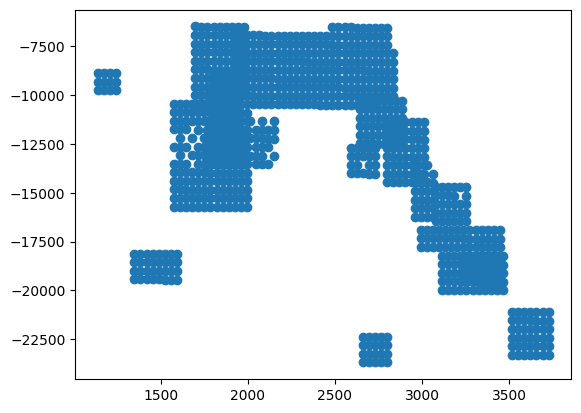

In [81]:
# plot electrode layout
plt.scatter( x , y )

(2000.0, 3000.0)

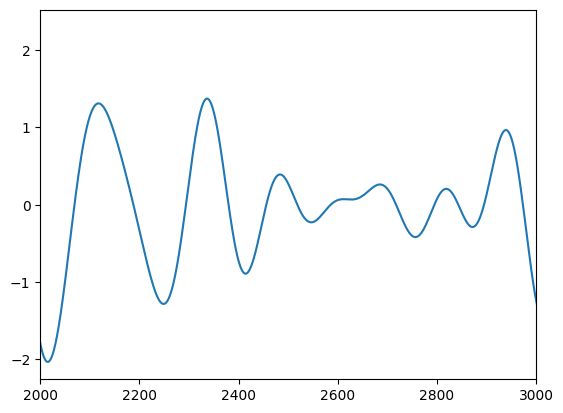

In [83]:
# plot scatter of one wave from data
plt.plot( [*range(len(waves["delta"][1,:]))], waves["theta"][20,:] )
plt.xlim(2000,3000)

## <font color="orange">Proccess Data 

We're going to use the delta waveform in the next step, so we get the necessary parameters for it

In [34]:
#delta_max = math.ceil( np.max( waves["delta"] ) )  # Get max and min values for
#delta_min = math.floor( np.min( waves["delta"] ) )

delta_max = np.mean(waves["delta"])+2*np.std(waves["delta"])
delta_min = np.mean(waves["delta"])-2*np.std(waves["delta"])

(2000.0, 3000.0)

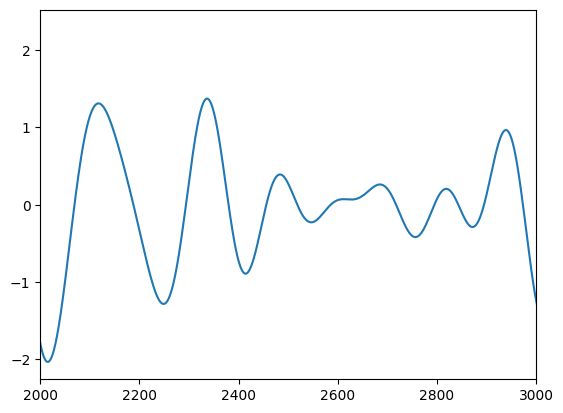

In [60]:
# plot scatter of one wave from data
plt.plot( [*range(len(waves["delta"][1,:]))], waves["theta"][20,:] )
plt.xlim(2000,3000)

# <font color="brown"> Animation - Try 2

## <font color="brown"> Funtion to plot data

 Create function that makes a scater plot of wave data

In [62]:
# Create function that makes a scater plot of wave data
def wave_plot(data, x, y ):
    #wave_max = np.mean(data)+2*np.std(data) # wave_min = np.mean(data)-2*np.std(data)
    norm = plt.Normalize( vmin= np.mean(data)-2*np.std(data), vmax= np.mean(data)+2*np.std(data) )
    
    plt.figure(figsize=(10, 10))
    plt.scatter( x, y, norm=norm, c=data, cmap=cm.coolwarm)
    plt.show()
    

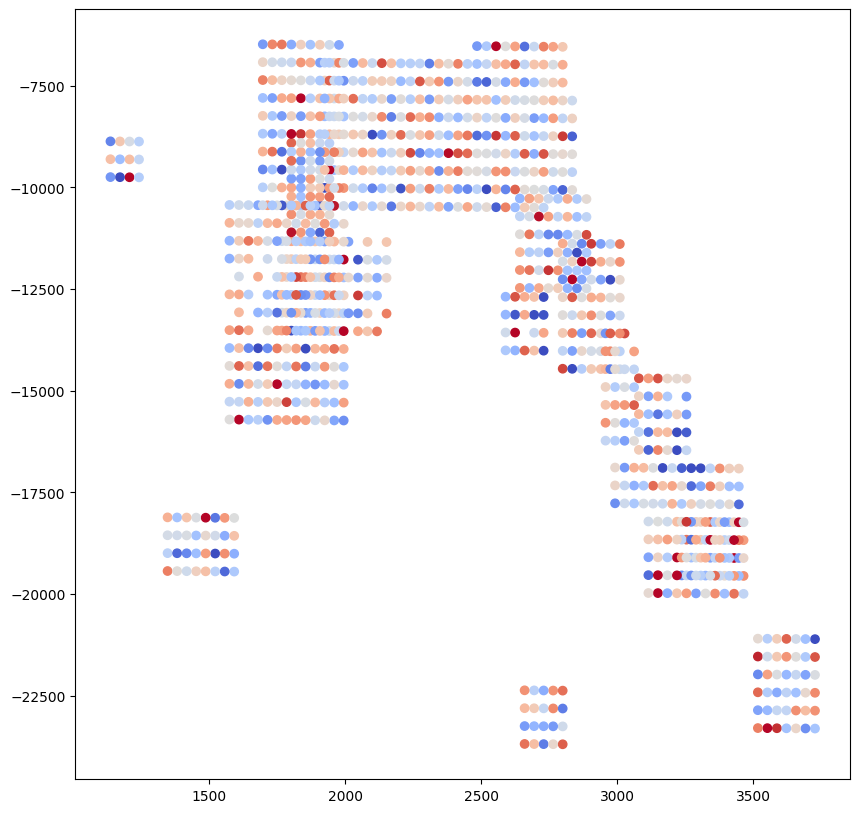

In [67]:
wave_plot( waves["delta"][:,1], x, y )

## <font color="brown"> Animation Example Code

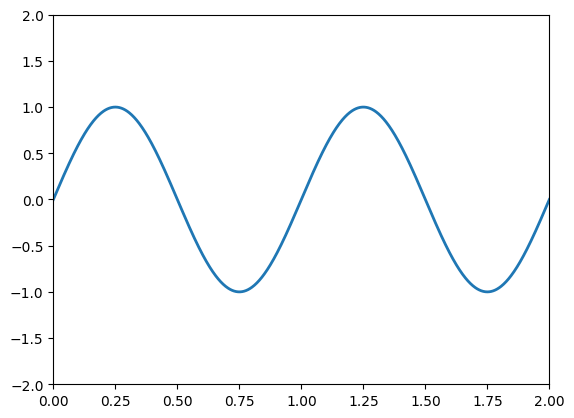

In [72]:
# Code from: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, #init_func=init,
                               frames=200, interval=20, blit=True)

In [73]:
anim.save("checkit2.mp4")

## <font color="brown"> Animation - My Code

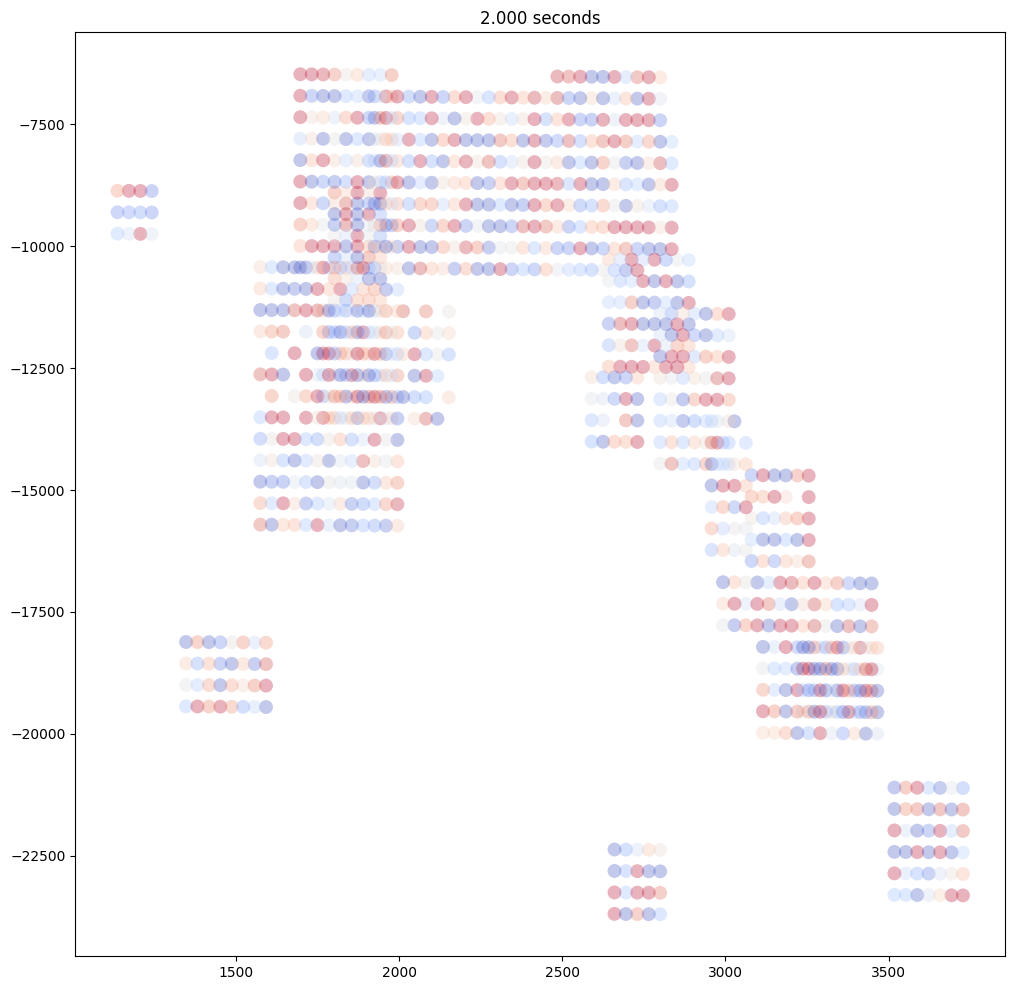

In [135]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes() #xlim=(1000,4000), ylim=(0,-25000)
#data = waves["theta"] + waves["delta"]
data = waves["delta"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2000, 4000, 14), interval=100, blit=False)

In [134]:
anim.save("checkit3.mp4")

# <font color="magenta">Bicucculine Animation

## <font color="magenta"> Create animation

In [38]:
x = data_pkl["xy"][:,1]
y = data_pkl["xy"][:,0]*-1

-4.2860500549157745 4.2888833005402205


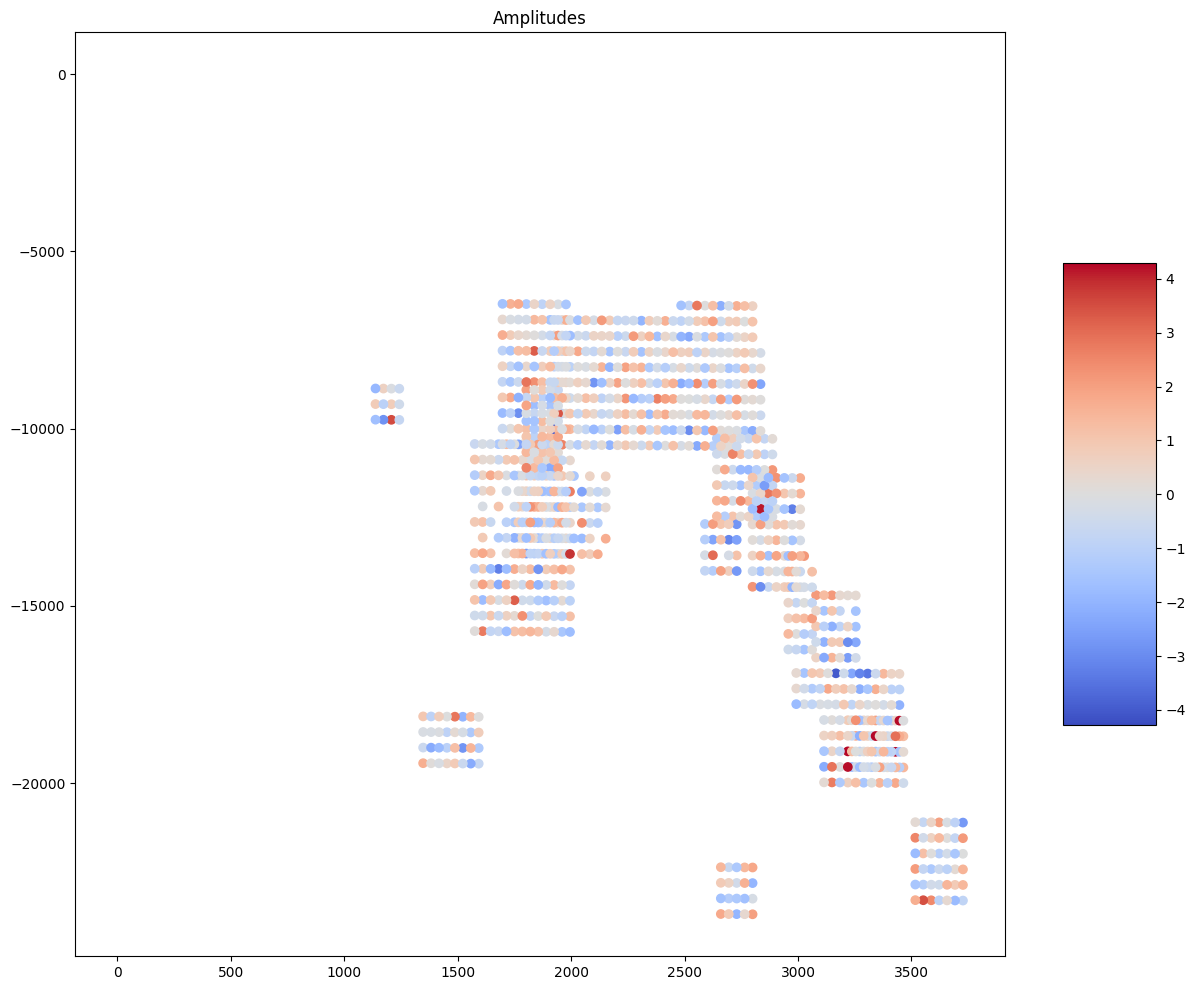

In [43]:
my_anime = AnimatedScatter2D( waves["delta"], x, y, zmin=delta_min, zmax=delta_max, frames= range(2000,3000,10) )

In [44]:
my_anime.save('checkit.mp4')

<font color="brown"> Tried making video in browser

In [78]:
# from IPython.display import HTML
# HTML( my_anime.ani.to_html5_video() )

## <font color="brown"> Create multiple scatter plots

-4.2860500549157745

In [25]:
norm = plt.Normalize( vmin=np.mean(waves["delta"])-2*np.std(waves["delta"]), vmax=np.mean(waves["delta"])+2*np.std(waves["delta"]))

In [28]:
# create a range from 0 to 100 that an interval of 10
#np.arange(0, 100, 10)
for i in range(2000, 3000, 10):
    print(i)

2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
2280
2290
2300
2310
2320
2330
2340
2350
2360
2370
2380
2390
2400
2410
2420
2430
2440
2450
2460
2470
2480
2490
2500
2510
2520
2530
2540
2550
2560
2570
2580
2590
2600
2610
2620
2630
2640
2650
2660
2670
2680
2690
2700
2710
2720
2730
2740
2750
2760
2770
2780
2790
2800
2810
2820
2830
2840
2850
2860
2870
2880
2890
2900
2910
2920
2930
2940
2950
2960
2970
2980
2990


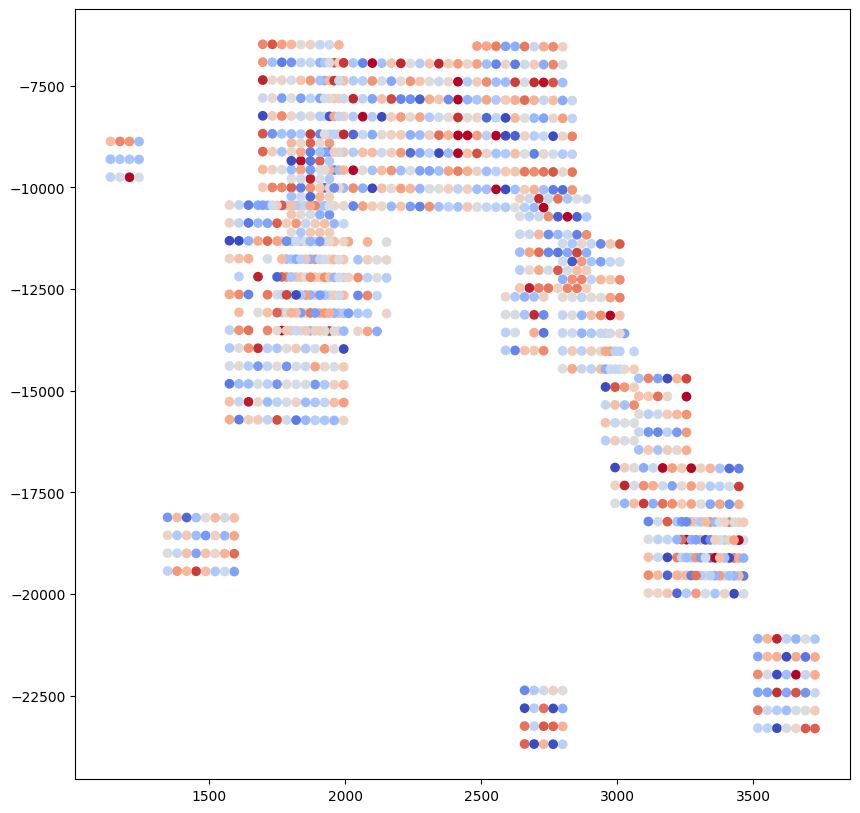

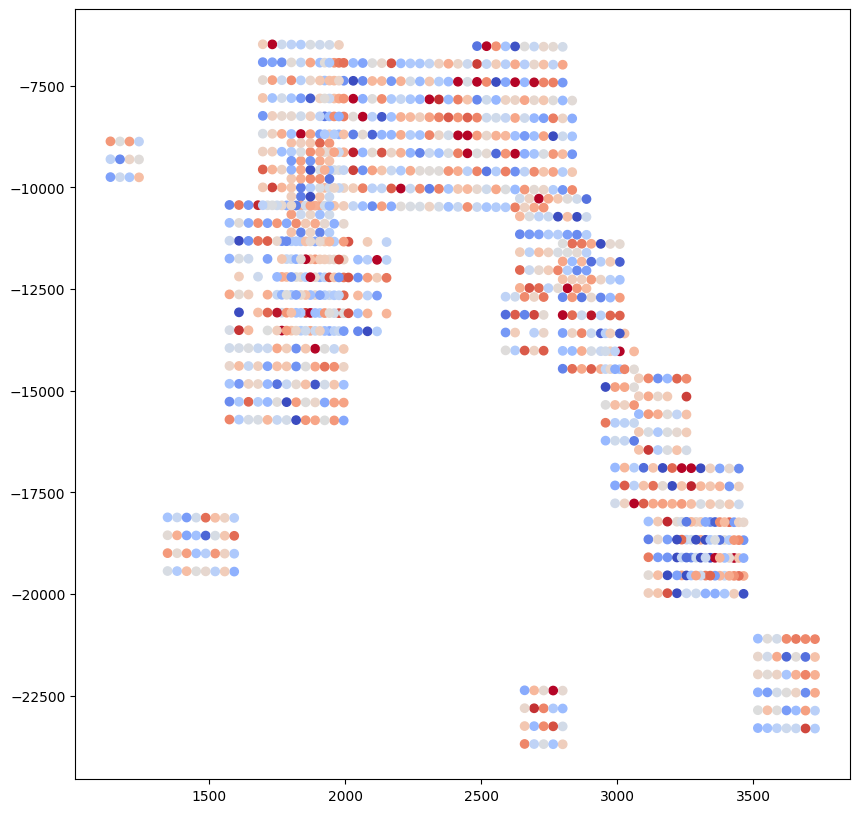

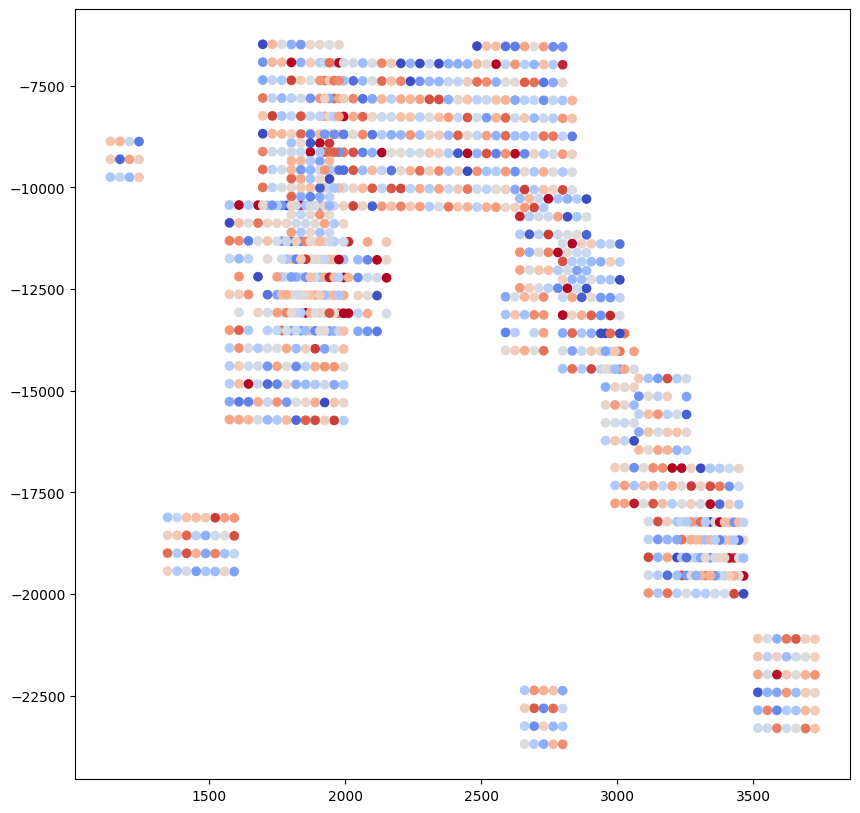

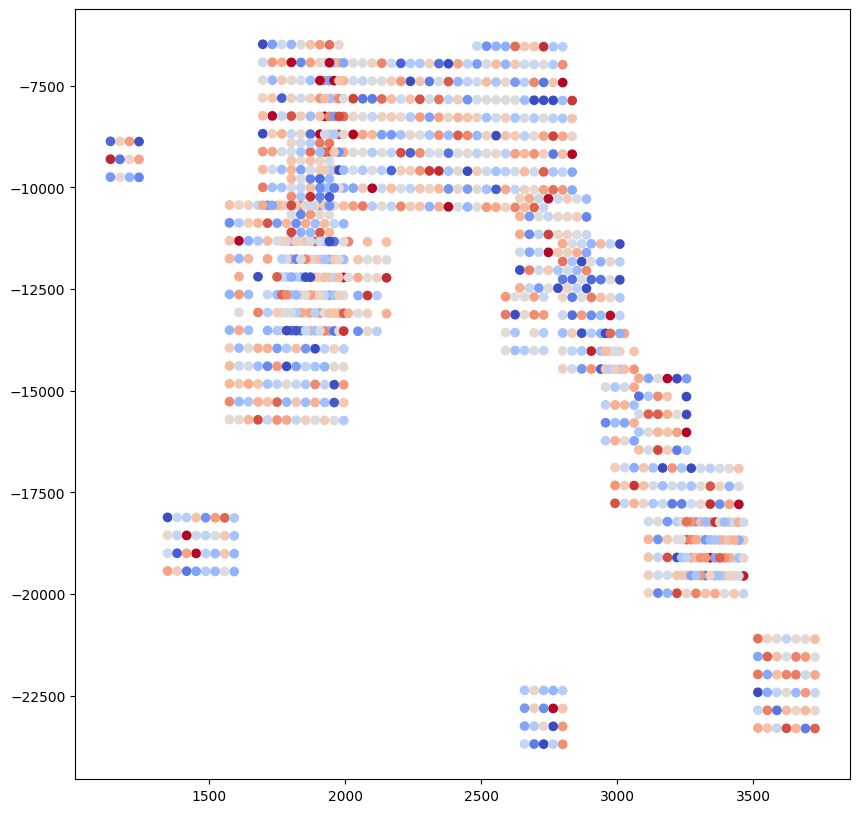

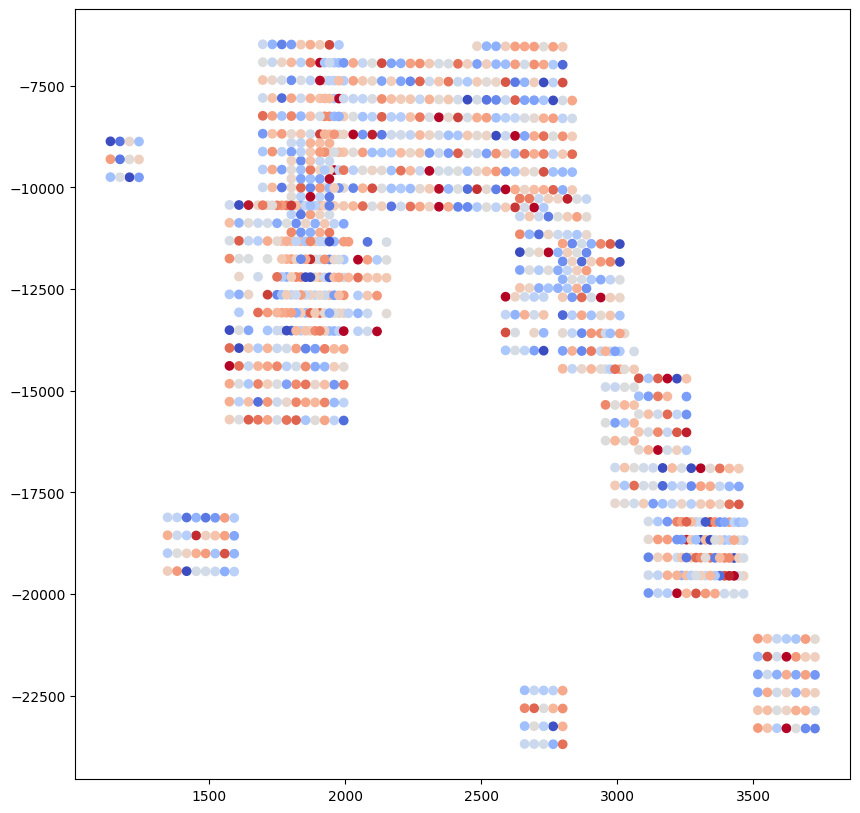

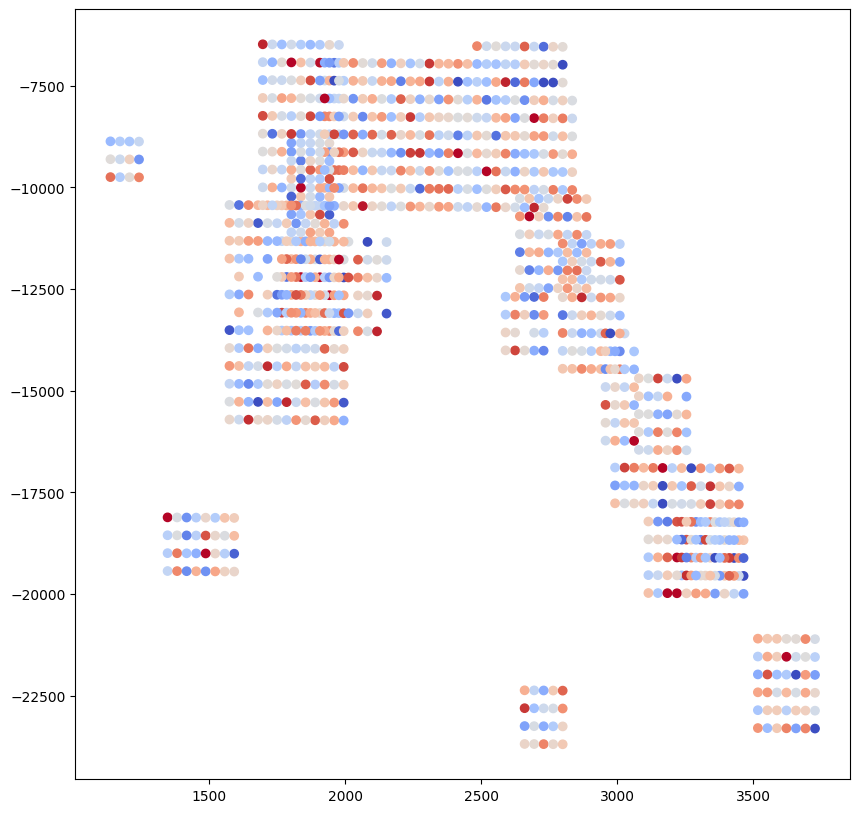

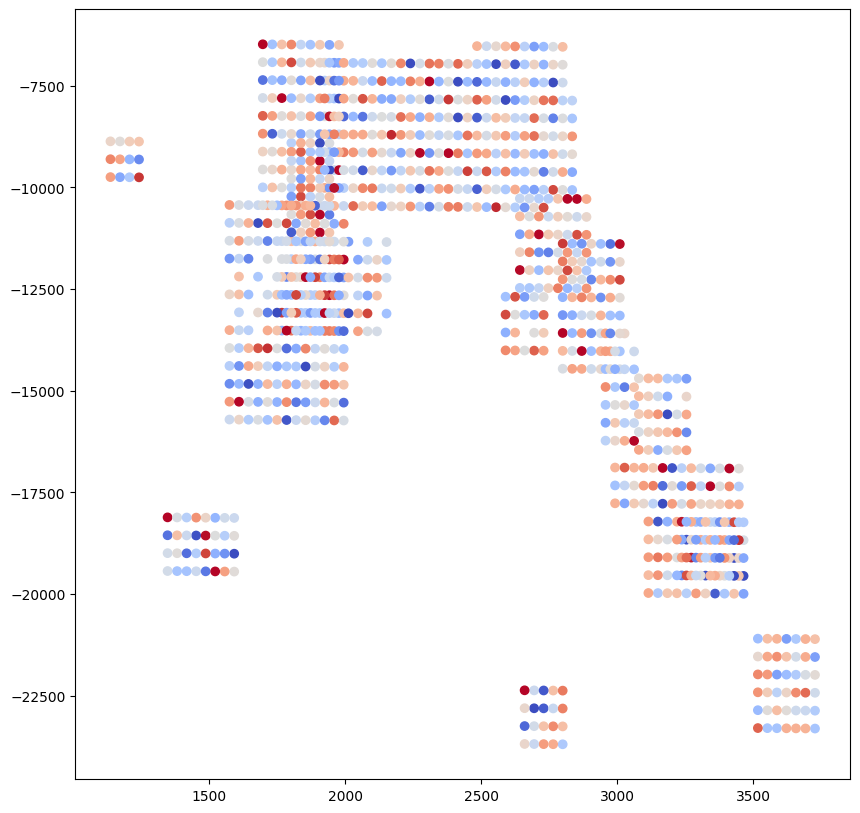

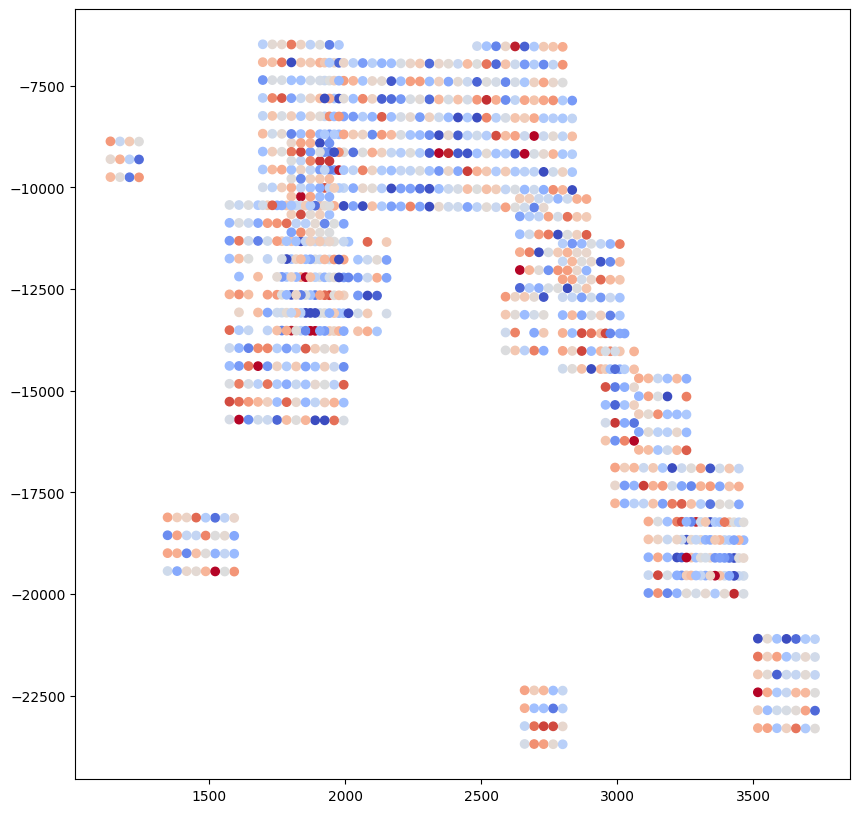

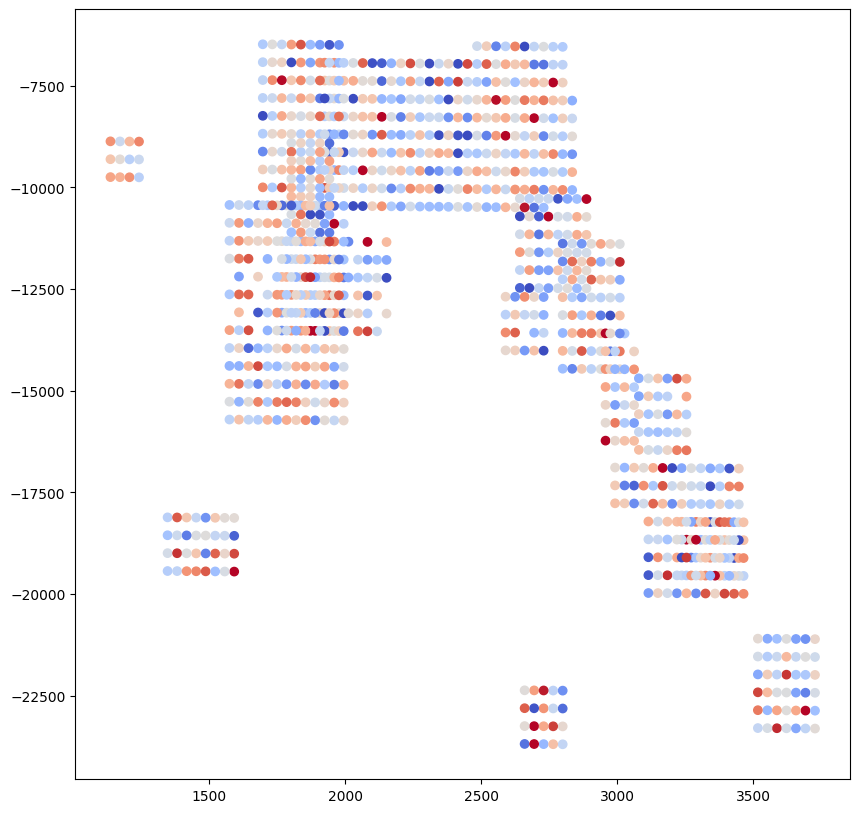

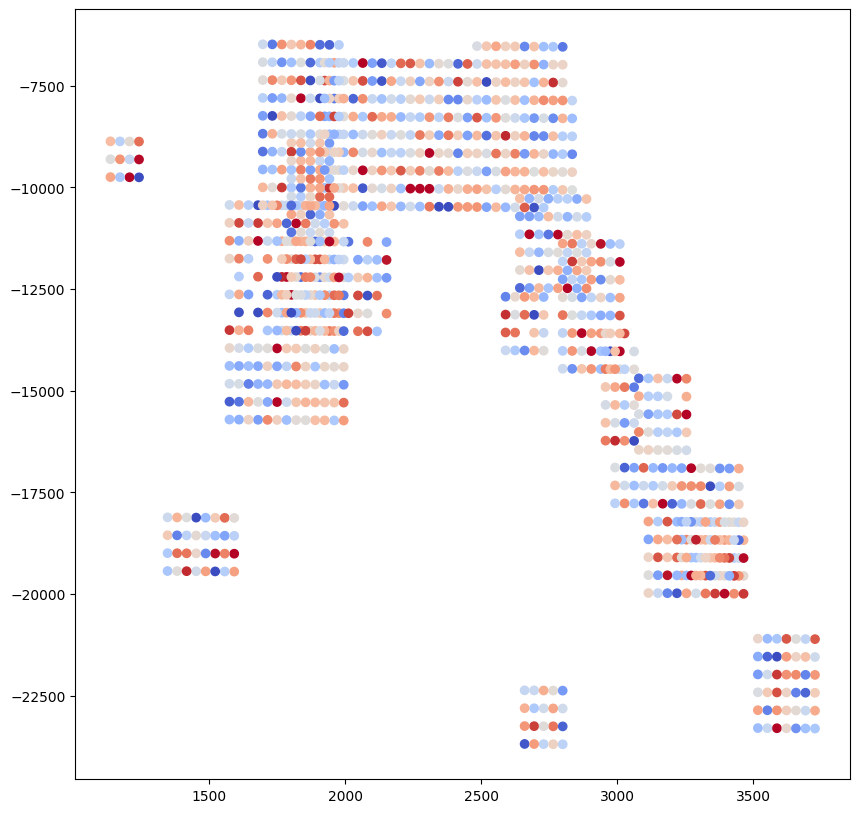

In [27]:
for i in range(2000, 3000, 100):
    #plt.figure(figsize=(20,4))
    #figsize=(15, 15)
    # set figrue size for plt
    plt.figure(figsize=(10, 10))
    plt.scatter( x, y, norm=norm, c= waves["delta"][:,i], cmap=cm.coolwarm)
    plt.show()


In [93]:
used_data[:,0]

array([537.6453 , 542.6195 , 517.04755, 532.0225 , 523.98395, 514.9394 ,
       501.14655, 518.9344 , 514.05365, 545.8253 , 528.9107 , 550.4314 ,
       529.07574, 514.94434, 515.0017 , 510.04654, 530.8466 , 529.60144,
       504.9892 , 506.04767, 526.9356 , 500.30847, 537.875  , 541.7371 ,
       531.83386, 491.22812, 537.6759 , 702.73315, 515.9295 , 528.7448 ,
       516.979  , 528.06885, 521.8461 , 531.8648 , 539.69806, 524.92267,
       525.90955, 533.8039 , 533.735  , 528.9682 , 525.9046 , 513.0267 ,
       525.9506 , 718.65656, 536.65027, 518.9383 , 534.75525, 518.0159 ,
       513.9864 , 538.8153 , 538.6997 , 517.11035, 523.82446, 520.0195 ,
       523.77466, 518.9762 , 512.9953 , 539.8447 , 527.9542 , 422.2931 ,
       515.9982 , 506.2005 , 537.67755, 504.20172, 513.1747 , 516.9669 ,
       510.26685, 526.1642 , 522.0158 , 515.1389 , 518.18384, 534.80884,
       506.1896 , 536.84796, 510.08847, 305.7595 , 505.11353, 530.9943 ,
       511.9857 , 518.78766, 527.8019 , 537.6324 , 

In [94]:
used_data[:,1000]

array([539.9621 , 540.62616, 516.2101 , 538.29767, 520.30304, 509.87326,
       502.2826 , 517.4226 , 513.9717 , 547.3427 , 532.3946 , 551.3705 ,
       532.91895, 519.1789 , 516.3346 , 515.20447, 524.3795 , 522.64124,
       500.0129 , 509.1183 , 528.7654 , 503.09048, 536.4219 , 548.7311 ,
       530.4934 , 491.2111 , 537.56085, 691.76605, 516.49475, 530.7254 ,
       520.019  , 533.2107 , 525.89996, 526.3871 , 536.58545, 520.9218 ,
       526.90845, 531.76776, 527.26764, 522.44714, 522.33234, 510.09894,
       527.6397 , 734.99255, 536.45703, 520.0032 , 529.9595 , 524.15344,
       517.30566, 535.4386 , 541.3931 , 524.2911 , 525.5646 , 525.2159 ,
       528.2581 , 521.8448 , 508.0368 , 537.4443 , 523.0818 , 424.93668,
       515.78107, 509.716  , 537.855  , 505.90024, 512.8699 , 511.53723,
       510.93887, 525.1579 , 527.8511 , 509.303  , 524.2778 , 529.6626 ,
       505.74457, 545.49963, 507.72763, 302.8921 , 502.3941 , 532.3709 ,
       514.1981 , 520.55835, 525.04724, 535.7002 , 